# PyTorch Computer Vision

## 0. Computer vision libraries PyTorch

* `torchvision` - base domain library for cv pytorch
* `torchvision.datasets` - get datasets and data loading functions for computer vision.
* `torchvision.models` - get pretrained cv models that you can leverage for your own problem.
* `torchvision.transforms` - functions for manipulating vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for pytorch.
* `torch.utils.data.DataLoader` - creates a python iterable over a dataset.


In [76]:
# PYTORCH
import torch
from torch import nn

# TORCHVISION
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# VISUALIZE
import matplotlib.pyplot as plt

# DATALOADER
from torch.utils.data import DataLoader



In [77]:
torchvision.__version__

'0.16.0+cu121'

## 1. Getting a dataset: fashionMNIST

In [78]:
# set up train data
train_data = datasets.FashionMNIST(
    root='data', # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download it?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [79]:
len(train_data), len(test_data)

(60000, 10000)

In [80]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [81]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [82]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [83]:
image, label = train_data[0]
print(f'Image shape: {image.shape} -> [colour channels, height, width]\nImage label: {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) -> [colour channels, height, width]
Image label: Ankle boot


### 1.1 Visualizing images

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

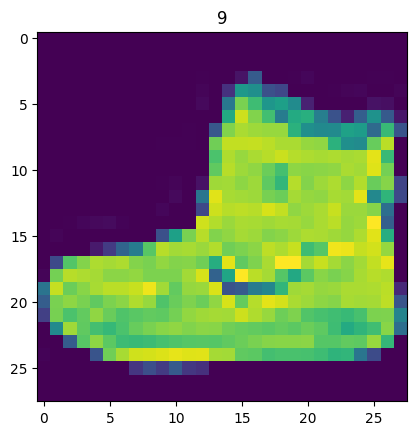

In [84]:
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze()) # remove extra dimension for channel before potting image
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

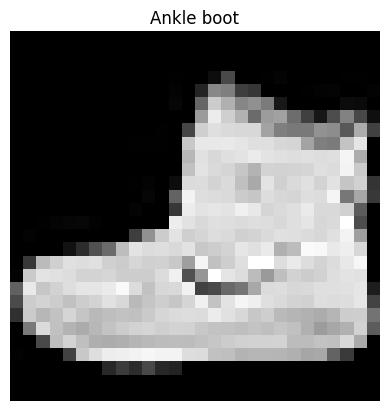

In [85]:
# grayscale plot
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

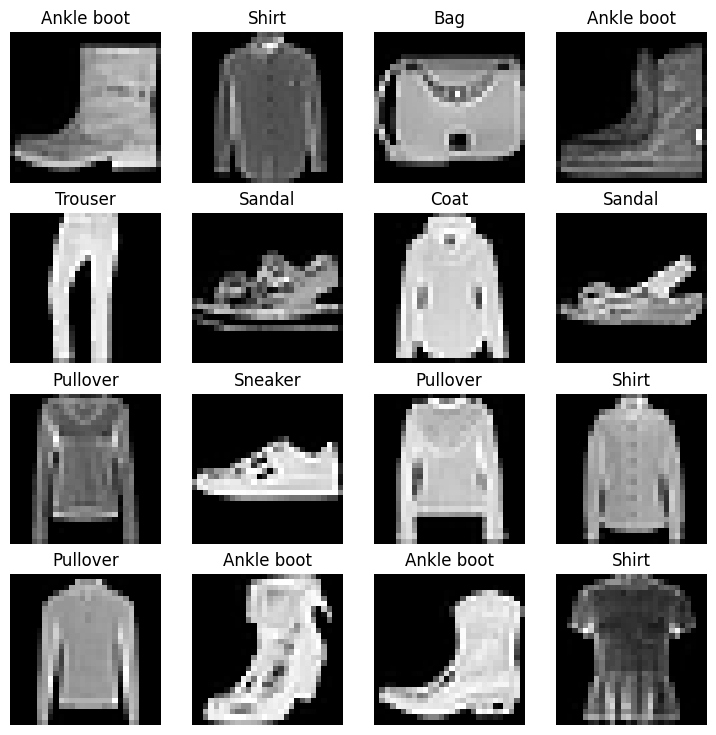

In [86]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    rand_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[rand_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)


## 2. Prepare Dataloader

Right now our data is in the form PyTorch Datasets.

Dataloader turns our dataset into a python iterable.

More specifically, we want to turn our data into batches/mini batches.

Why do we do this?
1. It is more computationally efficient, in that your computing hardwaare may not be able to look (store in memory) at 60,000 images in one hit, So we break it down to 32 images at a time(batch size of 32).
2. It gives our NN more chances to update its gradients per epoch.

In [87]:
BATCH_SIZE = 32

# turn dataset to iterable
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=32,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7912446a96c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7912446ab010>)

In [88]:
# let's check out what was created
print(f'DataLoader: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} ...')
print(f'Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE} ...')

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7912446a96c0>, <torch.utils.data.dataloader.DataLoader object at 0x7912446ab010>)
Length of train_dataloader: 1875 batches of 32 ...
Length of test_dataloader: 313 batches of 32 ...


In [89]:
# check whats insode training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # turn it into an iterable with `iter()` and get the next batch with`next()`
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


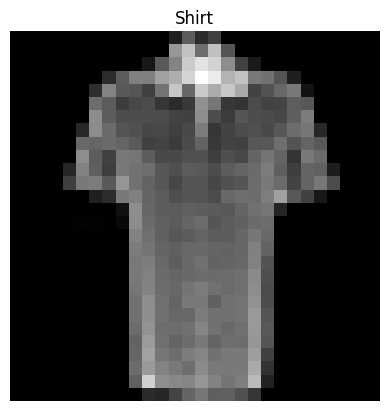

In [90]:
# show a ranadom sample from a batch
torch.manual_seed(42)
rand_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[rand_idx], train_labels_batch[rand_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

## 3. Model 0: Build a baseline model

When starting to build a series of ML modelling experiments, its best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [91]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten sample
output = flatten_model(x) #perform forward pass

# print what happened
print(f'Shape before flattening: {x.shape} -> [colour channels, height, width]')
print(f'Shape after flattening: {output.shape} -> [colour channels, height * width]')


Shape before flattening: torch.Size([1, 28, 28]) -> [colour channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [colour channels, height * width]


In [92]:
output.squeeze().shape

torch.Size([784])

In [93]:
class FashionMNISTV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)


In [94]:
torch.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_0 = FashionMNISTV0(input_shape=784, # this is 28*28
                         output_shape=len(class_names),# one for every class
                         hidden_units=16
                         ).to(device)

model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [95]:
# create dummy image and pass through the model
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x.to(device)).shape

torch.Size([1, 10])

### 3.1 Set up loss, optimizer and evaluation metrics

In [96]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
    print('helper_functions.py already exists, skipping download...')
else:
    print('Downloading helper_functions.py')
    r = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(r.content)

from helper_functions import accuracy_fn

helper_functions.py already exists, skipping download...


In [97]:
# ORRRR
%pip install torchmetrics

from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)
acc_fn

MulticlassAccuracy()

In [98]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr = 0.1)


### 3.2 Creating a function to time our experiments

Machine Learning is very experimental.

Two of the main things you'll often want to track are:
1. model's performance (loss and accuracy values for example).
2. How fast it runs

In [99]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
    """
    prints difference between start and end time.
    """
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

In [100]:
start_time = timer()
# Hello world
end_time = timer()
print_train_time(start=start_time, end=end_time, device=device)

Train time on cpu: 0.000 seconds


2.7950000003329478e-05

### 3.3 Creating a training loop and training model on batches of data
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss **per batch**.
3. Loop through testing batches, perform testing steps, calculate the test loss **per batch**.
4. Print out whats happening.
5. Time it all (for fun).


In [101]:
# import tqdm for progress bar for epochs
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_device = timer()

# set epochs (well keep it small for faster training time)
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n----------')
    # training
    train_loss = 0

    # add a loop to loop through the training batches
    # batch -> (torch.Size([32, 1, 28, 28]), torch.Size([32])) | (X, y)
    for batch_num, batch_data in enumerate(train_dataloader):
        X, y = batch_data
        model_0.train()

        # forward pass
        y_logits = model_0(X.to(device)).squeeze()
        y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

        # calculate the loss
        loss = loss_fn(y_logits, y.to(device))
        train_loss += loss # accumulate train loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        # print what's happening
        if batch_num % 400 == 0:
            print(f'Looked at {batch_num * len(X) / len(train_dataloader.dataset)} samples.')

    # divide total train loss by length of train data loader
    train_loss /= len(train_dataloader)

    # testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_logits = model_0(X_test.to(device)).squeeze()
            test_preds = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

            test_loss += loss_fn(test_logits, y_test.to(device))

            test_acc += acc_fn(test_preds, y_test.to(device))

        # calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # print what's happening
    print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

# calculate training time
train_time_end_on_device = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_device,
                                            end=train_time_end_on_device,
                                            device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Looked at 0.0 samples.
Looked at 0.21333333333333335 samples.
Looked at 0.4266666666666667 samples.
Looked at 0.64 samples.
Looked at 0.8533333333333334 samples.

Train loss: 0.5851 | Test loss: 0.5062, Test acc: 0.8224
Epoch: 1
----------
Looked at 0.0 samples.
Looked at 0.21333333333333335 samples.
Looked at 0.4266666666666667 samples.
Looked at 0.64 samples.
Looked at 0.8533333333333334 samples.

Train loss: 0.4750 | Test loss: 0.4842, Test acc: 0.8307
Epoch: 2
----------
Looked at 0.0 samples.
Looked at 0.21333333333333335 samples.
Looked at 0.4266666666666667 samples.
Looked at 0.64 samples.
Looked at 0.8533333333333334 samples.

Train loss: 0.4541 | Test loss: 0.4770, Test acc: 0.8341
Train time on cpu: 36.712 seconds


## 4. Make predictions and get model 0 results

In [102]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module, accuracy_fn, device):
    """
    Returns a dictionary containing the results of model predicting on data_loader.
    """
    loss, acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            # make_predictions
            logits = model(X)
            preds = torch.argmax(torch.softmax(logits, dim=1), dim=1)

            loss += loss_fn(logits, y)
            acc += accuracy_fn(preds, y)

        # scale loss and acc to find avg loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name': model.__class__.__name__, # this only works whe model was created with a class
            'model_loss': loss.item(),
            'model_acc': acc.item()}


model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=acc_fn, device=device)
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47699880599975586,
 'model_acc': 0.8340654969215393}

## 6. Experimentation

In [103]:
class FashionMNISTV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)
model_1 = FashionMNISTV1(input_shape=784, # this is 28*28
                         output_shape=len(class_names),# one for every class
                         hidden_units=16
                         ).to(device)

model_1

FashionMNISTV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=16, bias=True)
    (4): ReLU()
    (5): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [104]:
def train_step(dataloader, model, loss_fn, acc_fn, optimizer, device):
    """
    Performs a training with model trying to learn on data_loader.
    """
    train_loss, train_acc = 0, 0

    model.train()

    for batch_num, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            # forward pass
            y_logits = model(X).squeeze()
            y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

            # calculate the loss and acc
            loss = loss_fn(y_logits, y)
            train_loss += loss # accumulate train loss

            train_acc += acc_fn(y_preds, y)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            # # print what's happening
            # if batch_num % 400 == 0:
            #     print(f'Looked at {batch_num * len(X) / len(dataloader.dataset)} samples.')

    # divide total train loss by length of train data loader
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f} %.')



def test_step(dataloader, model, loss_fn, acc_fn, optimizer, device):
    """Performs a testing loop step on model going over data loader"""
    test_loss, test_acc = 0, 0

    model.eval()

    with torch.inference_mode():
        for X_test, y_test in dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_logits = model(X_test).squeeze()
            test_preds = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

            test_loss += loss_fn(test_logits, y_test)

            test_acc += acc_fn(test_preds, y_test)

        # calculate the test loss average per batch
        test_loss /= len(dataloader)

        # calculate the test acc average per batch
        test_acc /= len(dataloader)
        print(f'Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f} %.')



In [105]:
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)
# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_device = timer()

epochs=3

# create training and test loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n------------')
    train_step(dataloader=train_dataloader, model=model_1,
           loss_fn=loss_fn, acc_fn=acc_fn, optimizer=optimizer, device=device)

    test_step(dataloader=test_dataloader, model=model_1,
            loss_fn=loss_fn, acc_fn=acc_fn, optimizer=optimizer, device=device)

# calculate training time
train_time_end_on_device = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_device,
                                            end=train_time_end_on_device,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Train loss: 0.65971 | Train acc: 0.76 %.
Test loss: 0.53132 | Test acc: 0.81 %.
Epoch: 1
------------
Train loss: 0.46353 | Train acc: 0.83 %.
Test loss: 0.49047 | Test acc: 0.82 %.
Epoch: 2
------------
Train loss: 0.42539 | Train acc: 0.85 %.
Test loss: 0.45297 | Test acc: 0.84 %.
Train time on cpu: 44.984 seconds


In [106]:
# predictions model_1
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=acc_fn, device=device)
model_1_results

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.45296749472618103,
 'model_acc': 0.8418530225753784}

> **Note:** Sometimes, depending on your data/hardware, you might find that your model trains faster on CPU than on GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2. The heardware you're using has a better CPU in terms of capability than the GPU.
>

## Model 2: Building a CNN

In [107]:
# create cnn
class FashionMNISTV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        """
        Model architecture that replicates the TinyVGG model from CNN explainer website
        """
        super().__init__()
        self.conv_block_1 = nn.Sequential( # CNN block is conv_layer -> relu -> max_pool
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, # there is a trick to calculating this: print the shape of 2nd conv so see new di of image
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f'Output shape of conv_block_1: {x.shape}')
        x = self.conv_block_2(x)
        # print(f'Output shape of conv_block_2: {x.shape}')
        x = self.classifier(x)
        # print(f'Output shape of classifier: {x.shape}')
        return x

In [108]:
torch.manual_seed(42)

model_2 = FashionMNISTV2(input_shape=1, # number of colour channels
                         hidden_units=10,
                         output_shape=len(class_names)).to(device)

In [109]:
# pass image through model
rand_img_tensor = torch.randn(size=(1, 28, 28))
model_2(rand_img_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [110]:
torch.manual_seed(42)

# create a batch of images
images = torch.rand(size=(32, 3, 64, 64))
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image  shape: {test_image.shape}')
print(f'Test image:\n {test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single image  shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 

In [111]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# pass test image throught the layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.Maxpool2d()`

In [112]:
test_image.shape

torch.Size([3, 64, 64])

In [113]:
# print out original image shape without unsqueeze
print(f'Test image original shape: {test_image.shape}')
print(f'Test image with dimension: {test_image.unsqueeze(0).shape}')

# create a sample MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through just the conv layer
test_img_through_conv = conv_layer(test_image.unsqueeze(dim=0)) # conv_layer automatically unsqueezes test image in 0 dim before processing it
print(f'Shape after going through conv layer: {test_img_through_conv.shape}')

# pass data through max pool layer
test_img_through_conv_and_max_pool = max_pool_layer(test_img_through_conv)
print(f'Shape after going through conv layer and max pool layer: {test_img_through_conv_and_max_pool.shape}')


Test image original shape: torch.Size([3, 64, 64])
Test image with dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv layer: torch.Size([1, 10, 64, 64])
Shape after going through conv layer and max pool layer: torch.Size([1, 10, 32, 32])


In [114]:
torch.manual_seed(42)

# create a random tensor with a similar number of dimensions to our image
random_tensor = torch.randn(size=(1,1,2,2))
print(f'\nRandom tensor:\n{random_tensor}')
print(f'Random tensor shape: {random_tensor.shape}')

# create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax pool tensor:\n{max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')



Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss funct and optimizer

In [115]:
loss_fn = nn.CrossEntropyLoss()
acc_fn = Accuracy('multiclass', num_classes=len(class_names)).to(device)
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.4  Training and testing `module_2` using our training and testing functions

In [116]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# time it

train_time_start_model_2 = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n----------')
    train_step(dataloader=train_dataloader,
               model=model_2,
               acc_fn=acc_fn,
               loss_fn=loss_fn,
               optimizer=optimizer,
               device=device)

    test_step(dataloader=test_dataloader,
              model=model_2,
              acc_fn=acc_fn,
              loss_fn=loss_fn,
              optimizer=optimizer,
              device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 0.58653 | Train acc: 0.79 %.
Test loss: 0.39255 | Test acc: 0.86 %.
Epoch: 1
----------
Train loss: 0.36231 | Train acc: 0.87 %.
Test loss: 0.35723 | Test acc: 0.87 %.
Epoch: 2
----------
Train loss: 0.32485 | Train acc: 0.88 %.
Test loss: 0.32124 | Test acc: 0.88 %.
Train time on cpu: 147.339 seconds


In [117]:
# get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn = acc_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.3212365508079529,
 'model_acc': 0.8801916837692261}

In [118]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47699880599975586,
 'model_acc': 0.8340654969215393}

## 8. Compare model results and training time

In [119]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTV0,0.476999,0.834065
1,FashionMNISTV1,0.452967,0.841853
2,FashionMNISTV2,0.321237,0.880192


In [120]:
# add training time to results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTV0,0.476999,0.834065,36.711827
1,FashionMNISTV1,0.452967,0.841853,44.984201
2,FashionMNISTV2,0.321237,0.880192,147.339363


Text(0.5, 0, 'model')

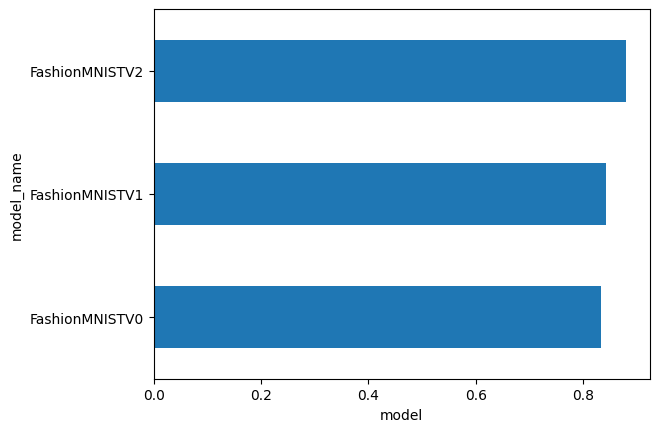

In [121]:
# visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuacy (%)')
plt.xlabel('model')

## 9. Make and evaluate random predictions with the best model

In [122]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # forward pass
            pred_logit = model(sample)

            # get pred prob
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)




In [123]:
img, label = test_data[0]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [124]:
import random

random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

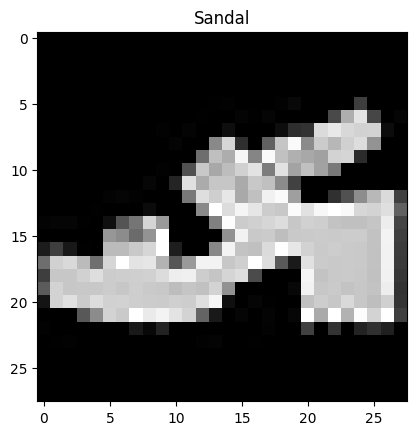

In [125]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [126]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# view forst two prediction probabilities
pred_probs[:2]

tensor([[1.7889e-07, 3.0100e-07, 7.4711e-08, 2.9112e-07, 4.0070e-08, 9.9988e-01,
         9.7217e-07, 1.5529e-05, 4.1133e-05, 6.1028e-05],
        [8.4885e-02, 5.9099e-01, 1.6154e-03, 1.5859e-01, 3.7294e-02, 1.3594e-04,
         1.2469e-01, 3.1763e-04, 1.2822e-03, 1.8921e-04]])

In [127]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [128]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

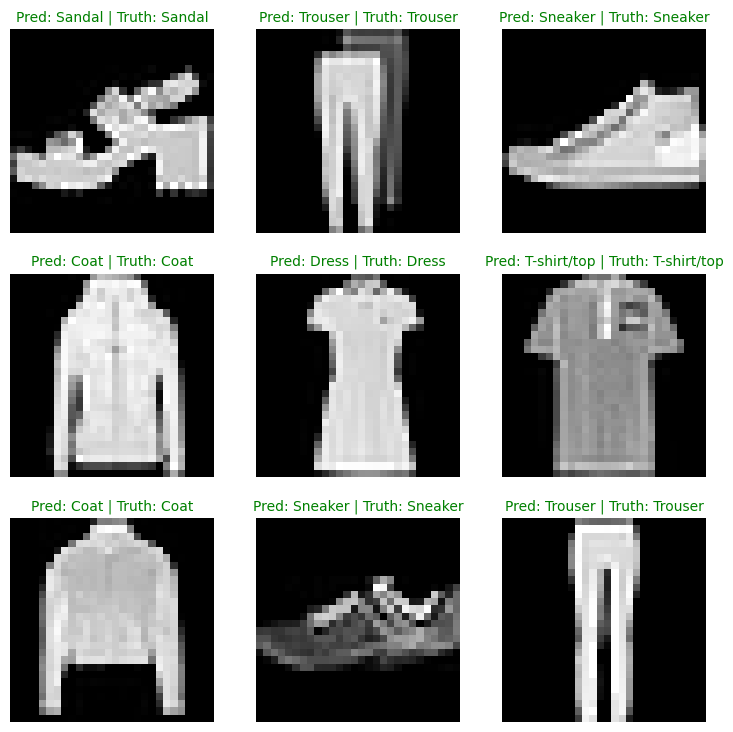

In [129]:
 # plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols=3

for i, sample in enumerate(test_samples):
    # create subplot
    plt.subplot(nrows, ncols, i+1)

    # plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # find the prediction
    pred_label = class_names[pred_classes[i]]

    # get the truth label in text form
    truth_label = class_names[test_labels[i]]

    # create a title for the plot
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'

    # check for equality between pred and truth and change colour of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') # green if prediction is correct
    else:
        plt.title(title_text, fontsize=10, c='r') # red if prediction is not correct

    plt.axis(False)


## 10. Making a confusion matrix for furher prediction evaluation

A confusion matrix is a great way of evaluationg your classification models visually:

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [131]:
# import tqdm.auto for progrss bar tracking
from tqdm.auto import tqdm

# 1. make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions'):
        # send the data and the targets to target device
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)

        # go from logits -> prediction probabilities -> predictions labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        # put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

# concatenate list of predictions into a tenso
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor[:10]

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [130]:
try:
    import mlxtend, torchmetrics
except:
    %pip install -q torchmetrics -U mlxtend
mlxtend.__version__

'0.22.0'

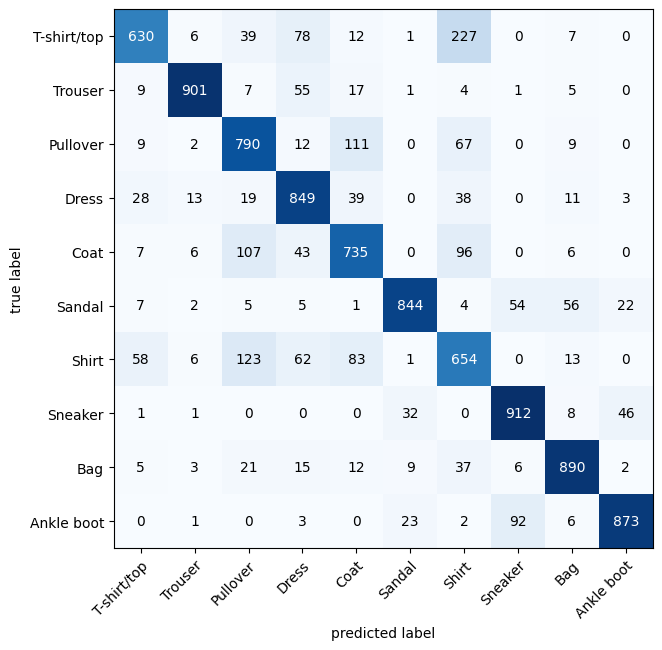

In [136]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. setup confusion matrix instance and compare predictions to targets
conf_matix = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
conf_matrix_tensor = conf_matix(preds=y_preds_tensor,
                                target=test_data.targets)

# 3. plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_tensor.numpy(), # mat plot lib likes working with numpy
                                class_names=class_names,
                                figsize=(10, 7))

In [135]:
conf_matrix_tensor

tensor([[630,   6,  39,  78,  12,   1, 227,   0,   7,   0],
        [  9, 901,   7,  55,  17,   1,   4,   1,   5,   0],
        [  9,   2, 790,  12, 111,   0,  67,   0,   9,   0],
        [ 28,  13,  19, 849,  39,   0,  38,   0,  11,   3],
        [  7,   6, 107,  43, 735,   0,  96,   0,   6,   0],
        [  7,   2,   5,   5,   1, 844,   4,  54,  56,  22],
        [ 58,   6, 123,  62,  83,   1, 654,   0,  13,   0],
        [  1,   1,   0,   0,   0,  32,   0, 912,   8,  46],
        [  5,   3,  21,  15,  12,   9,  37,   6, 890,   2],
        [  0,   1,   0,   3,   0,  23,   2,  92,   6, 873]])

## 11. Save and load the best performing model

In [139]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '03_compute_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

In [140]:
loaded_model_2 = FashionMNISTV2(input_shape=1, hidden_units=10, output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [142]:
# evaluate loaded model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=acc_fn,
    device=device
)
loaded_model_2_results == model_2_results

True

In [ ]:
# check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-02 # check that results are the same within 2 decimal points ie their tolerance
              )

## Exercises: https://colab.research.google.com/drive/1yaazb0vARr9bKdY4bduD_wa3b9FGHzx4?hl=en
